In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# Preprocess the data: One-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 4s 36ms/step - loss: 0.5267 - accuracy: 0.7869 - val_loss: 0.3912 - val_accuracy: 0.8610
Epoch 2/10
40/40 [==============================] - 1s 17ms/step - loss: 0.3157 - accuracy: 0.8902 - val_loss: 0.2994 - val_accuracy: 0.8866
Epoch 3/10
40/40 [==============================] - 1s 17ms/step - loss: 0.2374 - accuracy: 0.9173 - val_loss: 0.2775 - val_accuracy: 0.8916
Epoch 4/10
40/40 [==============================] - 1s 20ms/step - loss: 0.1957 - accuracy: 0.9325 - val_loss: 0.3141 - val_accuracy: 0.8752
Epoch 5/10
40/40 [==============================] - 1s 17ms/step - loss: 0.1691 - accuracy: 0.9413 - val_loss: 0.2814 - val_accuracy: 0.8896
Epoch 6/10
40/40 [==============================] - 1s 17ms/step - loss: 0.1452 - accuracy: 0.9510 - val_loss: 0.3083 - val_accuracy: 0.8800
Epoch 7/10
40/40 [==============================] - 1s 16ms/step - loss: 0.1315 - accuracy: 0.9558 - val_loss: 0.3080 - val_accuracy: 0.8842
Epoch 8/10
40

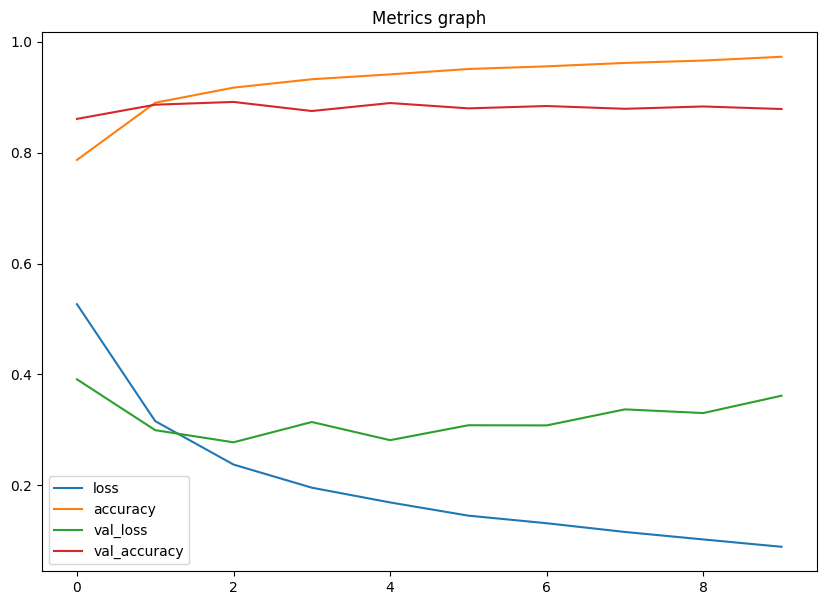

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)


782/782 [==============================] - 2s 3ms/step - loss: 0.3801 - accuracy: 0.8706


In [ ]:
print("Test Accuracy:", (test_accuracy*100))

Test Accuracy: 87.05599904060364


782/782 [==============================] - 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.84      0.87     12500
    Positive       0.85      0.90      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

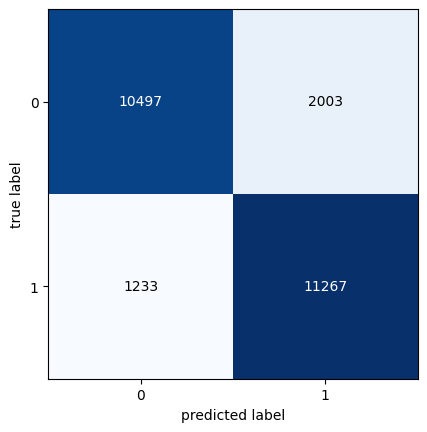

In [ ]:
# Predict probabilities for each class
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels using a threshold
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("\nClassification Report:")
print(class_report)

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_matrix)